In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import tensorflow as tf

from utils import get_train_test_dataset, show_result

In [2]:
(train_images, train_labels), (test_images, test_labels) = get_train_test_dataset(size=128)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [4]:
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=16,
    epochs=15,
)


Epoch 1/15
7/7 [==============================] - 1s 68ms/step - loss: 38.2128 - accuracy: 0.4600 - val_loss: 7.7716 - val_accuracy: 0.7500
Epoch 2/15
7/7 [==============================] - 0s 39ms/step - loss: 4.3317 - accuracy: 0.6500 - val_loss: 0.5350 - val_accuracy: 0.8500
Epoch 3/15
7/7 [==============================] - 0s 42ms/step - loss: 0.3790 - accuracy: 0.9000 - val_loss: 0.3865 - val_accuracy: 0.9000
Epoch 4/15
7/7 [==============================] - 0s 43ms/step - loss: 0.4471 - accuracy: 0.9200 - val_loss: 0.1765 - val_accuracy: 0.9500
Epoch 5/15
7/7 [==============================] - 0s 36ms/step - loss: 0.1252 - accuracy: 0.9600 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 6/15
7/7 [==============================] - 0s 37ms/step - loss: 0.0705 - accuracy: 0.9700 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/15
7/7 [==============================] - 0s 36ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 8/15
7/7 [==========

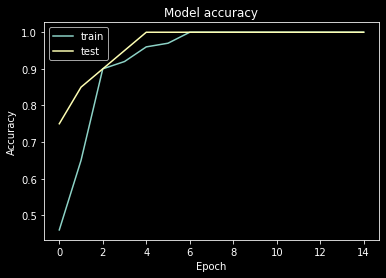

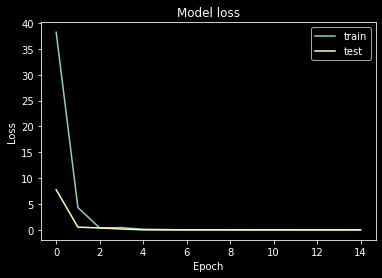

In [5]:
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
train_result = model.predict(train_images).argmax(axis=-1)
test_result = model.predict(test_images).argmax(axis=-1)

1/1 [==============================] - 0s 25ms/step


trafficlight: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


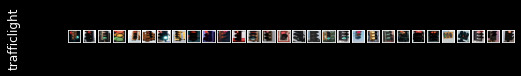

stop: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56]


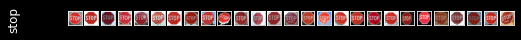

speedlimit: [57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


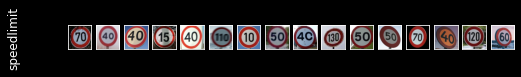

crosswalk: [73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


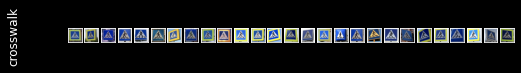

In [7]:
show_result(train_result, train_images)

trafficlight: [0 1 2 3 4]


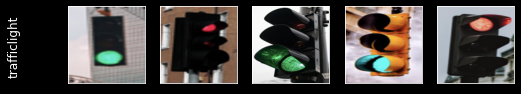

stop: [5 6 7 8 9]


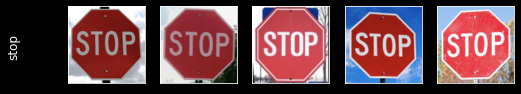

speedlimit: [10 11 12 13 14]


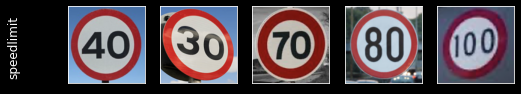

crosswalk: [15 16 17 18 19]


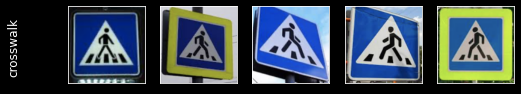

In [8]:
show_result(test_result, test_images)